In [79]:
import sys
import os
import json
sys.path.append(os.path.expanduser('~/git/analysis_playground/bayesian-fitting'))
sys.path.append(os.path.expanduser('~/git/nh3-analysis'))

import numpy as np
import scipy.stats
from matplotlib import pyplot as plt
import matplotlib.lines as mlines

from matplotlib.path import Path
from matplotlib.patches import PathPatch

%matplotlib ipympl

import warnings
warnings.filterwarnings('ignore', module='numpy')
warnings.filterwarnings('ignore')



In [90]:
def plot_dyn_sld(dynamic_run, dyn_fit_dir=None, model_name='__model'):
    _file_list = sorted(os.listdir(dyn_fit_dir))
    file_list = [_f for _f in _file_list if _f.startswith('r%d_t' % dynamic_run)]

    max_len = 0

    sld_array = []
    for _file in file_list:
        profile_file = os.path.join(dyn_fit_dir, str(_file), '%s-profile.dat' % model_name)
        if not os.path.isfile(profile_file):
            print("Could not find: %s" % profile_file)
            continue
        _data = np.loadtxt(profile_file).T
        max_len = max(max_len, len(_data[0]))
        sld_array.append(_data[1])

    print("Max len", max_len)
    padded_sld = []
    for a in sld_array:
        padded_sld.append(np.pad(a, (max_len-len(a),0), mode='edge'))

    padded_sld = np.asarray(padded_sld)

    print(padded_sld.shape)
    fig, ax = plt.subplots()
    cmap = 'tab20c'
    #cmap = 'copper'
    c = ax.imshow(padded_sld, cmap=cmap, vmin=-2, vmax=8,
              extent=[0, 0.1*max_len, 0, 360],
              interpolation='nearest', origin='lower', aspect='auto')
    fig.colorbar(c, ax=ax)



Max len 10689
(12, 10689)
Max len 10174
(12, 10174)
Max len 12212
(12, 12212)


Text(0.5, 1.0, 'Cu-B (Jan)')

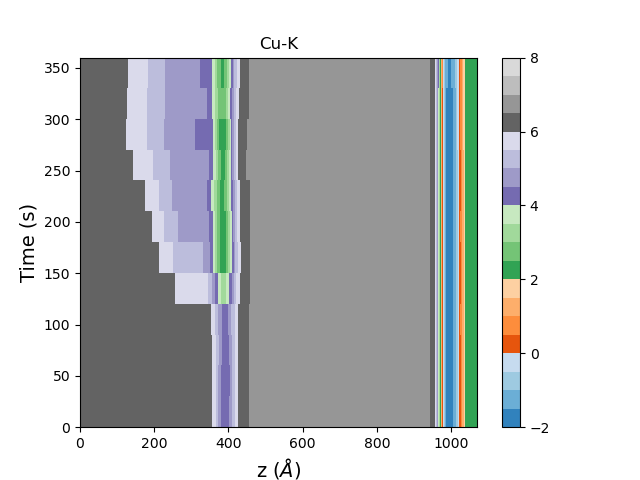

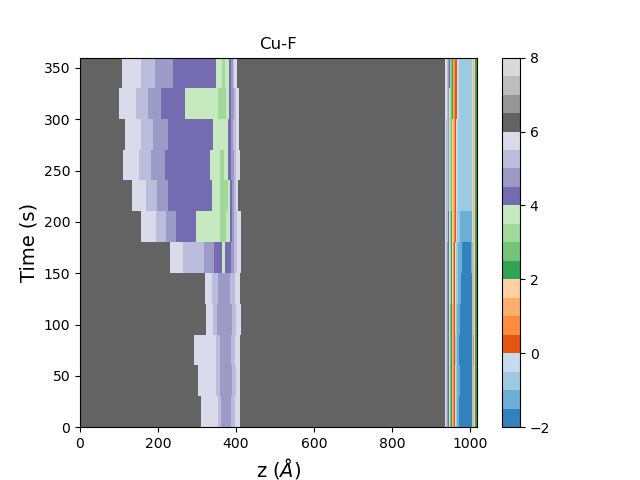

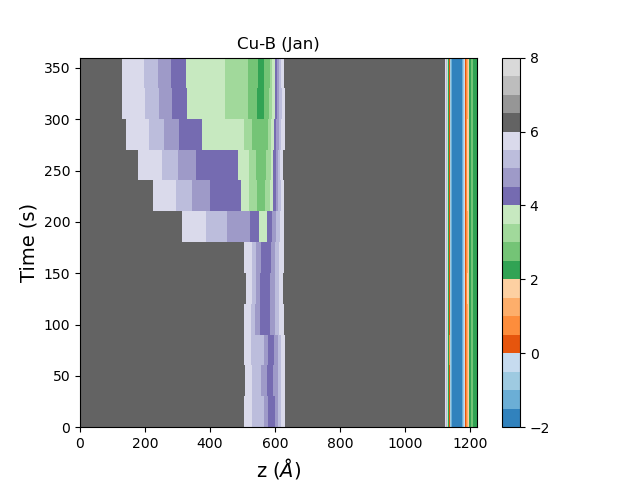

In [92]:
# Cu-K
dyn_fit_dir = '/SNS/users/m2d/git/nh3-analysis/july2023/dyn-fitting/207275-dyn/results-30s-bck-v2'
plot_dyn_sld(dynamic_run=207275, dyn_fit_dir=dyn_fit_dir, model_name='model-loop-207275')
plt.xlabel('z ($\AA$)', fontsize=14)
plt.ylabel('Time (s)', fontsize=14)
plt.title("Cu-K")

# Cu-F
dyn_fit_dir = '/SNS/users/m2d/git/nh3-analysis/july2023/dyn-fitting/207168-dyn/results-30s-bck'
plot_dyn_sld(dynamic_run=207168, dyn_fit_dir=dyn_fit_dir, model_name='model-loop-207168')
plt.xlabel('z ($\AA$)', fontsize=14)
plt.ylabel('Time (s)', fontsize=14)
plt.title("Cu-F")

# Cu-B
dyn_fit_dir = '/SNS/users/m2d/git/nh3-analysis/jan2023/dyn-fitting/201289-dyn/results-30s-bck'
plot_dyn_sld(dynamic_run=201289, dyn_fit_dir=dyn_fit_dir, model_name='model-loop-201289')
plt.xlabel('z ($\AA$)', fontsize=14)
plt.ylabel('Time (s)', fontsize=14)
plt.title("Cu-B (Jan)")